This notebook contains:
- Explanation how to create an average over several frames using cv2.accumulate
- Image intensities may be real numbers
- Image intensities may be even negative numbers

In [2]:
#from ipywidgets import interact, interactive, fixed
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats=['png']

import cv2

cv2.accumulate creates an arithmetic mean of two images. So if you have two source images src1 and src2, running 

    dist = src1
    cv2.accumulate(src2,dist)

you create 
    
    dist = 1/2(src2 + dist) = (src1 + src2)/2. 

This however means, that running accumulate twice, like

    dist = src1
    cv2.accumulate(src2,dist)
    cv2.accumulate(src3,dist)

you create 

    dist = ((src1 + src2)/2 + src3) / 2
    dist = src1/4 + src2/4 + src3/2

which is not what we want.... We can use other function called accumulateWeighted, that computes weighted sum of images:

    dist = src1
    cv2.accumulateWeighted(src2,dist,alpha)

produces

    dist = src2*alpha + (1-alpha)*dist = src2*alpha + (1-alpha)*src1

This can be used in the following way: if we create consequtively our average picture avg and we remember how many frames already have been added to it, we can set proper alpha when adding next frame. So assume we have added n frames and we suceeded to have 

    avg = (src1 + src2 + ... + srcn)/n

Then we set 

    alpha = 1/(n+1)

and we run 

    cv.accumulateWeighted(src{n+1},avg,alpha)

which produces

    avg = src{n+1}*alpha + avg*(1-alpha) =
    src{n+1}/(n+1)+(src1 + src2 + ... + srcn)/n*(1-1/(n+1)) =
    (src1 + src2 + ... + srcn + src{n+1})/(n+1)

(0.0, 191.0)

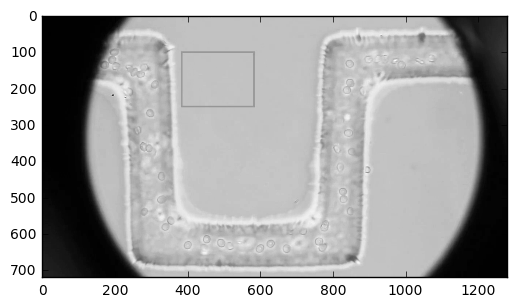

In [3]:
# nFrames remembers the number of frames inside average
nFrames = 0
# load new image 
pic = cv2.imread("Frames10/A.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# avg is our average picture
avg = np.float32(picGray)
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")
# find minimal and maximal pixel values
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(picGray)
minVal,maxVal

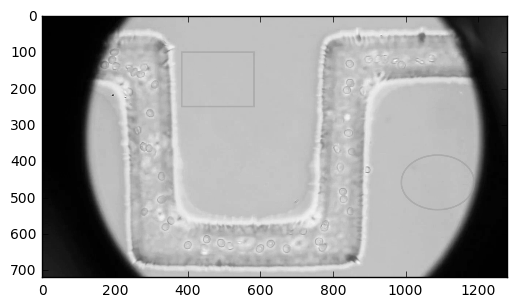

In [4]:
# load new image 
pic = cv2.imread("Frames10/B.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")




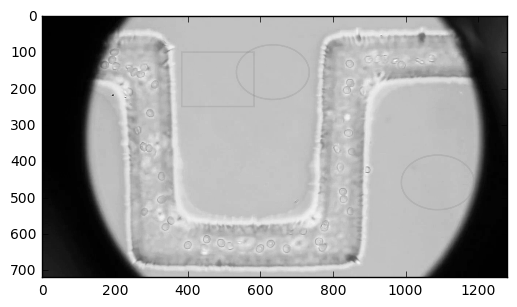

In [5]:
# load new image 
pic = cv2.imread("Frames10/C.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")


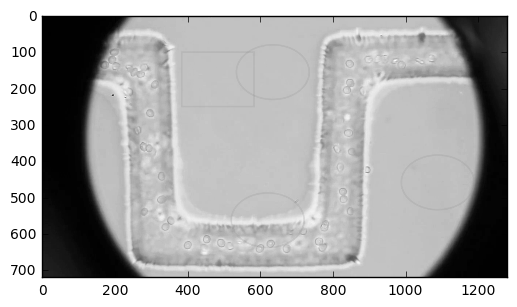

In [6]:
# load new image 
pic = cv2.imread("Frames10/D.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

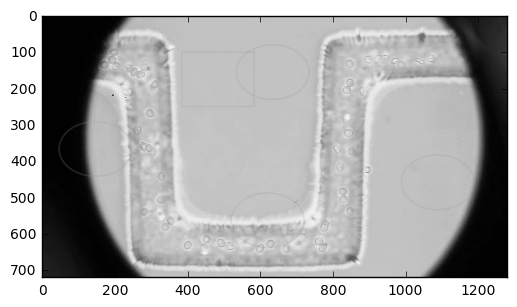

In [7]:
# load new image 
pic = cv2.imread("Frames10/E.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

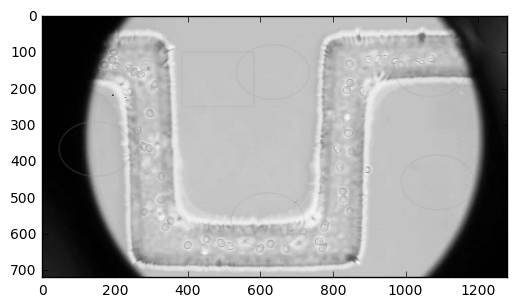

In [8]:
# load new image 
pic = cv2.imread("Frames10/F.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

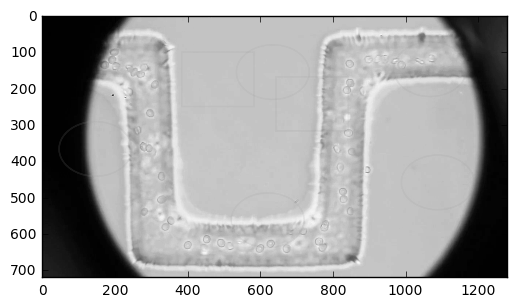

In [9]:
# load new image 
pic = cv2.imread("Frames10/G.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

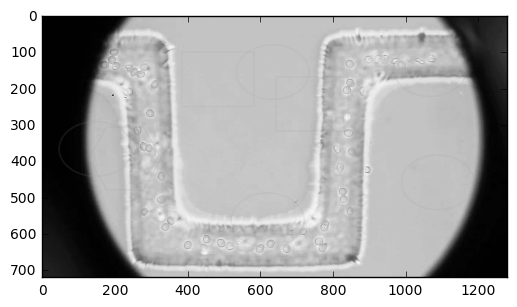

In [10]:
# load new image 
pic = cv2.imread("Frames10/H.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

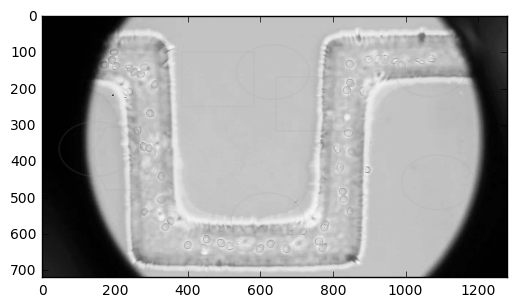

In [11]:
# load new image 
pic = cv2.imread("Frames10/I.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

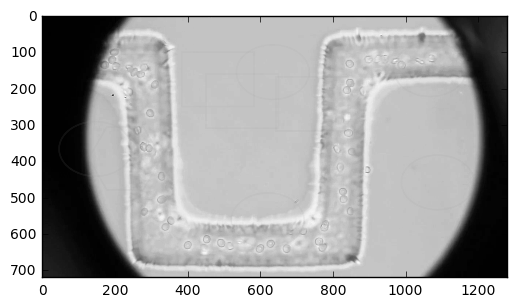

In [12]:
# load new image 
pic = cv2.imread("Frames10/J.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# add new picture to the average picture, 
# however with specific weight depending on the number of previously added frames
cv2.accumulateWeighted(picGray, avg, 1.0/(nFrames + 1.0))
nFrames += 1
# show average picture
plt.imshow(avg,cmap="gray")

Average image subtraction

When subtracting the average, one can get negative values of image intensity. Therefore we check the intensity. For thresholding, it is crucial to know the lower and upper bounds, or, even better to normalize the image so that the range of the intensities is again 0 to 255.

(-34.19999694824219, 7.600006103515625)

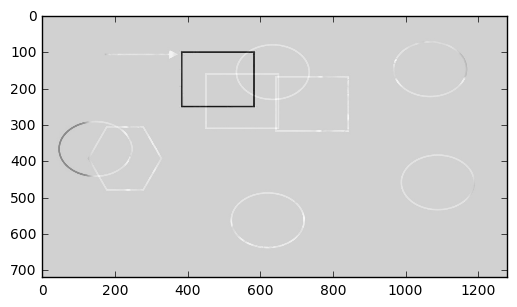

In [16]:
# now we subtract averaged picture from the original
# load original image 
pic = cv2.imread("Frames10/A.jpg")
picGray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
# subtract the averaged image
picGray = picGray - avg
# show image with subtracted background
plt.imshow(picGray,cmap="gray")
# Checking for minimal and maximal values of intensity
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(picGray)
minVal,maxVal

In [17]:
# normalizing the image
cv2.normalize(picGray,picGray,0,255,cv2.NORM_MINMAX)
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(picGray)
minVal,maxVal

(0.0, 255.0)